# Brain Tumor Detection

### Importing Modules

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

### Loading Data

In [37]:
import os
path=os.listdir("../Brain_Tumor_Detection/Training/")
classes={"no_tumor":0,"pituitary_tumor":1,"glioma_tumor":2,"meningioma_tumor":3}
path


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [38]:
import cv2 as cv
X=[]
Y=[]#Target Labels
for cls in classes:
    pth="../brain_Tumor_Detection/Training/"+cls
    for j in os.listdir(pth):
        img=cv.imread(pth+"/"+j,0)
        img=cv.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])




In [39]:
X=np.array(X)
Y=np.array(Y)
uniq=np.unique(Y)
pd.Series(Y).value_counts()

1    827
2    826
3    822
0    395
Name: count, dtype: int64

In [40]:
X.shape## 2870 sample each one has a size of 200x200



(2870, 200, 200)

### Visualising Data

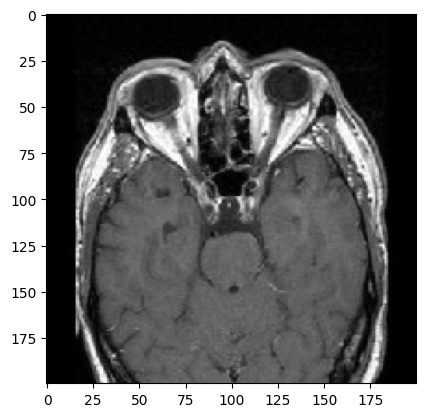

In [41]:
plt.imshow(X[0],cmap="gray")

### Data Preparation

In [42]:
X_reshaped=X.reshape(len(X),-1)
X_reshaped.shape

(2870, 40000)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_reshaped,Y,test_size=0.3,random_state=42)

### Feature Scaling

We can either divide by 255 the values or use the **`StandardScalar`** function

In [44]:
X_train=X_train/255
X_test=X_test/255
#print(X_train.max(),X_train.min())
#print(X_test.max(),X_test.min())


In [45]:
#from sklearn.preprocessing import StandardScaler
#scalar=StandardScaler()
#X_trained_scaled=scalar.fit_transform(X_train)
#X_test_scaled=scalar.transform(X_test)

### Model Training

In [46]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
model=OneVsRestClassifier(SGDClassifier(random_state=0))
params={'estimator__loss':["hinge","log_loss"]}
kf=KFold(n_splits=5,shuffle=True,random_state=42)
model_cv=RandomizedSearchCV(model,params,cv=kf,n_iter=5,random_state=0,n_jobs=-1)#n_jobs=-1 in order to use all available cores
model_cv.fit(X_train,y_train)
print(model_cv.best_params_,model_cv.best_score_)
        



c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'estimator__loss': 'log_loss'} 0.7635662088559696


###  Model Evaluation

In [53]:
model_cv.score(X_test,y_test)
y_pred=model_cv.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.71      0.73      0.72       115
           1       0.89      0.95      0.92       262
           2       0.84      0.75      0.79       250
           3       0.67      0.69      0.68       234

    accuracy                           0.79       861
   macro avg       0.78      0.78      0.78       861
weighted avg       0.79      0.79      0.79       861



### Model Testing

In [48]:
choice={0:"no_tumor",1:"pituitary_tumor",2:"glioma_tumor",3:"meningioma_tumor"}

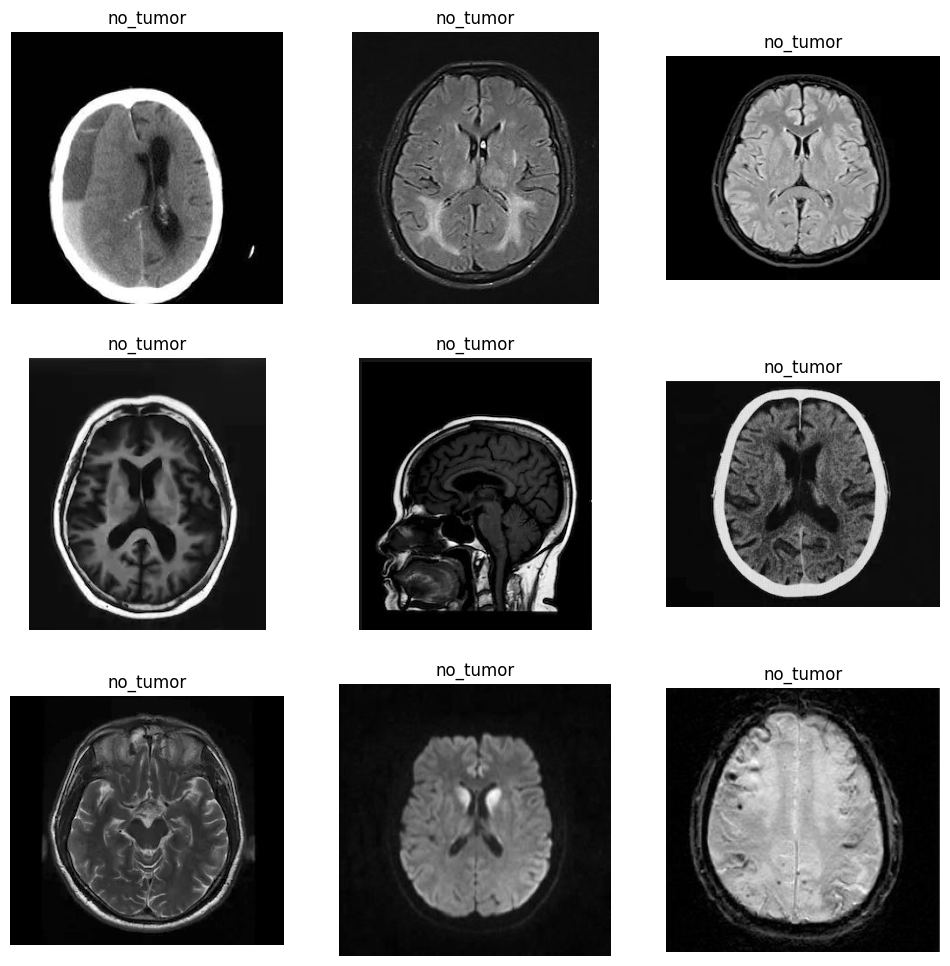

In [50]:
plt.figure(figsize=(12,12))
p=os.listdir("../brain_tumor_detection/Testing/")
col=1
for i in os.listdir("../brain_tumor_detection/Testing/no_tumor/")[:9]:
    plt.subplot(3,3,col)
    img=cv.imread("../brain_tumor_detection/Testing/no_tumor/"+i,0)
    img1=cv.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    pt=model_cv.predict(img1)
    plt.title(choice[pt[0]])
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    col+=1

